In [364]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [365]:
#увеличим дефолтный размер графиков
from pylab import rcParams
rcParams['figure.figsize'] = 12,9

## Датасет с параметрами футболистов из FIFA19

In [366]:
df = pd.read_csv('fifa19.csv')

In [367]:
df.head(1)

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M


Преобразуем некоторые показатели в числовые

In [368]:
df['Value'] = df['Value'].apply(lambda x: str(x).replace('€', '').replace('M', '').replace('K', '') ).astype(float)

In [369]:
df['Wage'] = df['Wage'].apply(lambda x: str(x).replace('€', '').replace('K', '') ).astype(float)

In [370]:
df['Height'] = df['Height'].apply(lambda x: str(x).replace("'", ".") )
df['Height'] = df['Height'].apply(lambda x: str(x).replace(",", ".") )
df['Height'] = df['Height'].astype(float)

Добавим укрупненно позицию (из формальной позиции получим специализацию)

In [371]:
speciality_dict = {'goalkeeper': ['GK'], 
                   'defender': ['RCB', 'CB', 'LCB', 'LB', 'RB', 'RWB', 'LWB'],
                   'middlefielder': ['RCM', 'LCM', 'LDM', 'CAM', 'CDM', 'LAM', 'RDM', 'CM', 'RAM'],
                   'winger': ['RF', 'LW', 'LF', 'RM', 'LM', 'RW'],
                   'forward': ['ST', 'RS', 'LS', 'CF']}

In [372]:
def specialization(position):
    
    for i in speciality_dict.items():
        if position in i[1]:
            return i[0]

In [373]:
df['Speciality'] = df['Position'].apply(specialization)

#### Для удобства подготовим топ-10 стран и топ-5 стран

In [374]:
top_countries = pd.DataFrame(df['Nationality'].value_counts())

top_10_countries_list = top_countries.head(10).index.tolist()
top_5_countries_list = top_countries.head(5).index.tolist()

In [375]:
data_10 = df[ df['Nationality'].isin(top_10_countries_list) ]
data_5 = df[ df['Nationality'].isin(top_5_countries_list) ]

## Визуализация

#### Тепловая карта - позиции игроков по национальностям (из топ-10 стран)

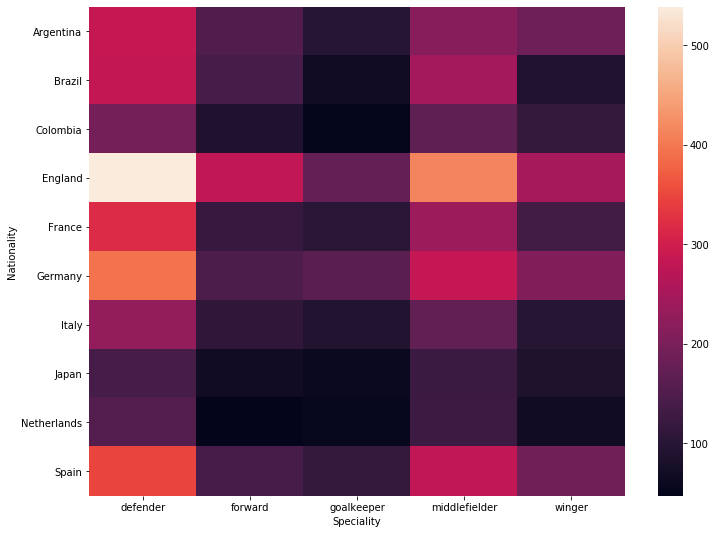

In [376]:
nation_position_count = data_10.pivot_table(
                        index='Nationality', 
                        columns='Speciality', 
                        values='ID', 
                        aggfunc=len).fillna(0)

sns.heatmap(nation_position_count)

+ Похоже, больше всего в принципе игроков из Англии. В частности  - защитников 
+ Главные поставщики вратарей - Англий и Германия.
+ Совсем нет атакующих игроков и вратарей из Нидерландов, что многое объясняет
+ У Испании есть явная специализация, а вот Аргентина скорее универсальна

#### Взаимосвязь скорости и роста (все страны)

/Users/kostya/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/kostya/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


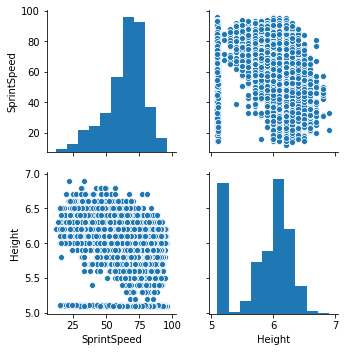

In [377]:
sns.pairplot(data = df[['SprintSpeed', 'Height']] )

+ Похоже, в данных по росту есть выбросы
+ Но в целом видно, что с ростом игрока снижается его вероятная скорость

#### Нации с лучшей физподготовкой (из топ-5)

/Users/kostya/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/Users/kostya/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


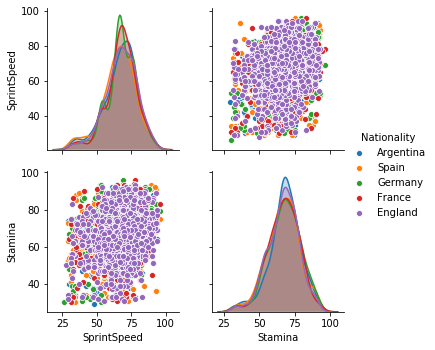

In [378]:
data_ = data_5[data_5['Position'] != 'GK'][['SprintSpeed', 'Stamina', 'Nationality']]

fig  = sns.pairplot(data = data_, hue = 'Nationality' )
plt.show()

+ В Аргентине и Англии чуть больше игроков со средней выносливостью
+ В Аргентине средняя скорость чуть выше чем в  других странах
+ Больше всего игроков с самой частой скоростью - в Германии и Франции
+ В Испании есть игрок с уникально низкой выносливостью при высокой скорости

#### гистограмма с рейтингом игроков

Text(0.5, 1.0, 'Распределение рейтинга игроков')

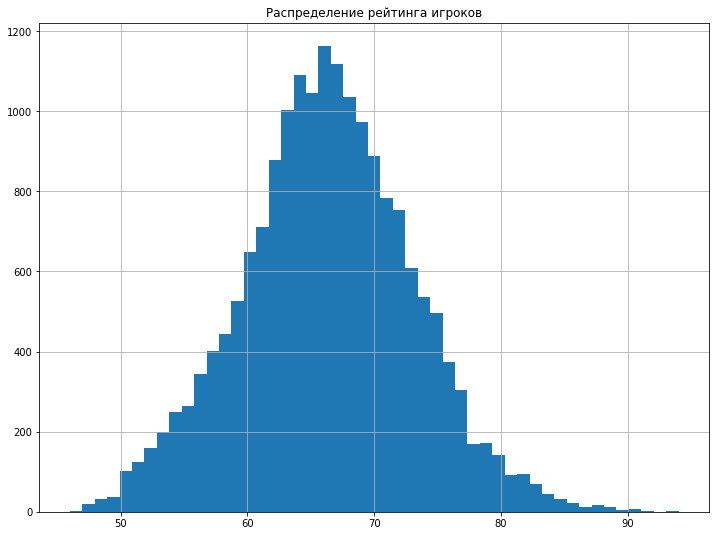

In [379]:
df['Overall'].hist(bins=49)
plt.title('Распределение рейтинга игроков')

+ распределение рейтинга игроков похоже на нормальное, но более узкий размах
+ число игроков с рейтингом выше среднего менее равномерно снижается с движением от среднего, чем при снижении

#### боксплот с зарплатой игроков по топ-10 странам

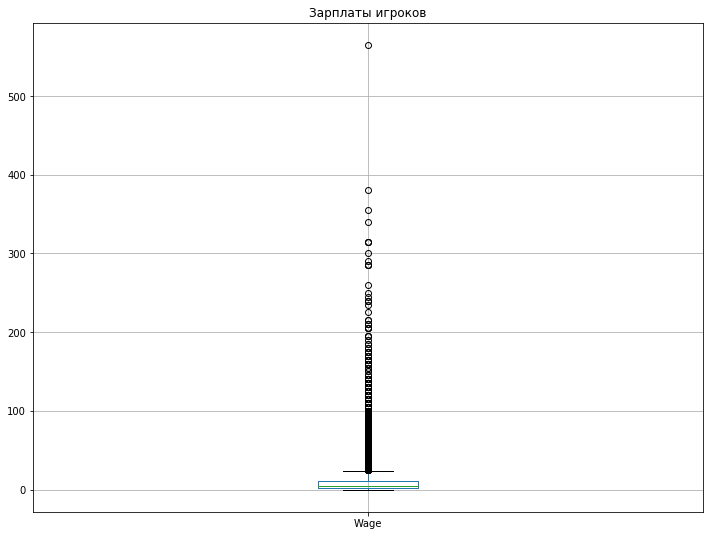

In [380]:
data_10[['Wage']].plot(kind='box', title='Зарплаты игроков', grid=True)

+ Есть немало игроков с зарплатой, которую можно интерпретировать как "выбросы"
+ Боксплот получился очень маленьким и прижатым к низу - как и везде, средняя зарплата ощутимо ниже лучших цифр

#### Посмотрим на зарплаты и рейтинг в контексте позиций

Text(0.5, 1.0, 'Зарплаты игроков в зависимости от позиции')

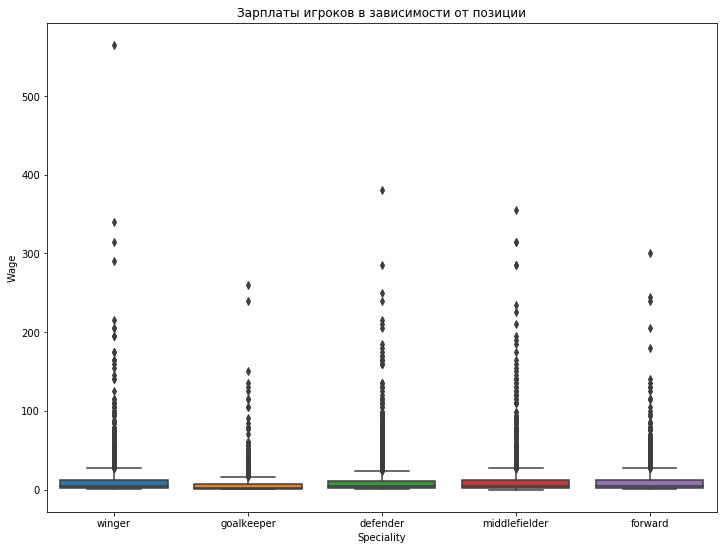

In [381]:
sns.boxplot(x="Speciality", y="Wage", data=data_10)
plt.title('Зарплаты игроков в зависимости от позиции')

+ Бросаются вглаза чуть более низкие и в  среднем и по выбросам зарплаты вратарей
+ есть 1 winger с аномальной зарплатой - мы знаем, кто это
+ как и на общем графике, трудно интерпретировать из-за большого числа выбросов

Text(0.5, 1.0, 'Рейтинги игроков в зависимости от позиции')

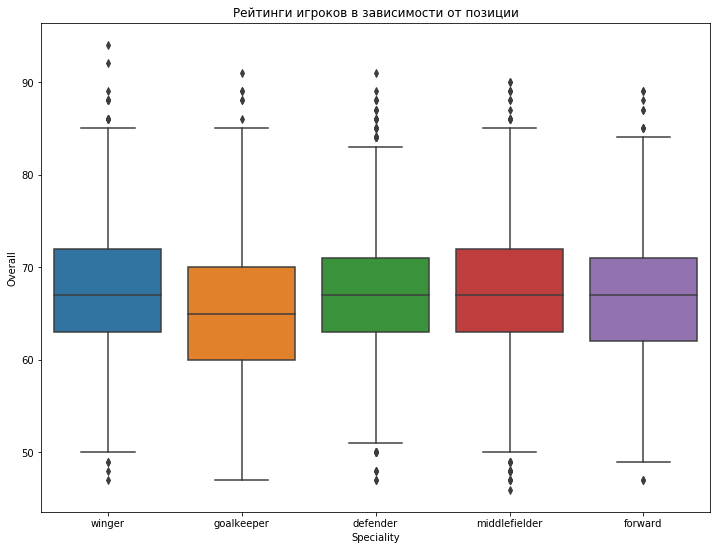

In [382]:
sns.boxplot(x="Speciality", y="Overall", data=data_10)
plt.title('Рейтинги игроков в зависимости от позиции')

+ Все куда более равномерно, что мы +/- видели на гистограмме
+ Средний рейтинг вратарей чуть ниже чем других позиций + нет выбросов вниз
+ Лучшие значения у вингеров

#### корреляция между рейтингом игрока, возрастом и зарплатой

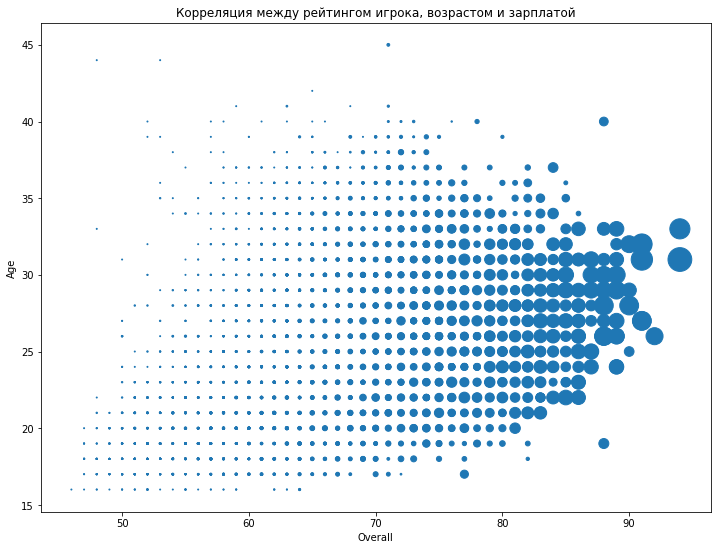

In [383]:
df.plot(kind='scatter', 
        x='Overall', 
        y='Age', 
        s=df['Wage'],
        title='Корреляция между рейтингом игрока, возрастом и зарплатой')

+ Ожидаемо с ростом рейтинга растет зарплата
+ С определенного возраста стремительно снижается рейтинг и с ним зарплата
+ Самое большое вознаграждение сконцентрировано у игроков ~25-33 лет
+ Есть два игрока с наибольшим рейтингом, большими зарплатами с высоким возрастом. Мы знаем, кто это
+ Есть по 1 игроку с аномально высоким рейтингом и высокой зарплатой для их высокого и низкого возраста